<font color='turquoise'><font size='5'>**Python Project:** Exploring the Indian Agriculture Dataset</font>

<font color='turquoise'><font size='3'>**Introduction**</font>

In this notebook, we explore the Indian agricultural dataset to find patterns and try to get insights while also checking the data integrity.

This notebook is structured as follows:
* Importing and cleaning the data
* Exploratory data analysis (EDA) and visualisation
* Further Analysis












<font color='turquoise'><font size='3'>**Importing and cleaning the data**</font>


In [55]:
# import the requied packages
import numpy as np # importing the numpy package with an alias, np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px

sns.set_style('ticks')

In [4]:
# mount drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
# import data
agri_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ICRISAT-District Level Data.csv")

In [6]:
# check the data
agri_df.describe()

Dist Code          Year    State Code  RICE AREA (1000 ha)  \
count  16146.000000  16146.000000  16146.000000         16146.000000   
mean     269.769231   1991.496841      9.568562           128.593192   
std      278.309125     15.011185      4.988538           160.078825   
min        1.000000   1966.000000      1.000000            -1.000000   
25%       78.000000   1978.000000      6.000000            10.400000   
50%      156.000000   1991.000000     10.000000            66.800000   
75%      241.000000   2005.000000     12.000000           191.390000   
max      917.000000   2017.000000     20.000000          1154.230000   

       RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  \
count                 16146.000000            16146.000000   
mean                    224.889565             1486.924784   
std                     326.629828              956.185281   
min                      -1.000000               -1.000000   
25%                       9.460000              800.000000   
50%                      95.840000             1333.210000   
75%                     315.715000             2113.517500   
max                    3215.010000             5653.830000   

       WHEAT AREA (1000 ha)  WHEAT PRODUCTION (1000 tons)  \
count          16146.000000                  16146.000000   
mean              77.057946                    182.012746   
std              100.394479                    348.834254   
min               -1.000000                     -1.000000   
25%                1.770000                      2.000000   
50%               36.800000                     42.700000   
75%              123.000000                    215.192500   
max              879.490000                   4305.500000   

       WHEAT YIELD (Kg per ha)  KHARIF SORGHUM AREA (1000 ha)  ...  \
count             16146.000000                   16146.000000  ...   
mean               1492.419859                      22.632268  ...   
std                1081.255367                      45.062714  ...   
min                  -1.000000                      -1.000000  ...   
25%                 750.000000                       0.000000  ...   
50%                1347.450000                       2.050000  ...   
75%                2131.580000                      20.900000  ...   
max                5541.520000                     334.800000  ...   

       SUGARCANE YIELD (Kg per ha)  COTTON AREA (1000 ha)  \
count                  16146.00000           16146.000000   
mean                    4500.15306              28.018367   
std                     3153.97042              74.239648   
min                       -1.00000              -1.000000   
25%                     2000.00000               0.000000   
50%                     4502.21000               0.050000   
75%                     6704.60500              10.097500   
max                    22062.30000             800.890000   

       COTTON PRODUCTION (1000 tons)  COTTON YIELD (Kg per ha)  \
count                   16146.000000              16146.000000   
mean                        7.229225                124.644823   
std                        25.042132                207.681147   
min                        -1.000000                 -1.000000   
25%                         0.000000                  0.000000   
50%                         0.000000                  0.000000   
75%                         2.000000                202.270000   
max                       376.610000               5000.000000   

       FRUITS AREA (1000 ha)  VEGETABLES AREA (1000 ha)  \
count           16146.000000               16146.000000   
mean                7.750478                  11.086250   
std                13.591135                  18.003257   
min                -1.000000                  -1.000000   
25%                 0.310000                   1.600000   
50%                 2.220000                   4.740000   
75%                 8.790000                  12.510000   
max 

In [7]:
agri_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [8]:
#check for null values
agri_df.isnull().sum()

Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64

In [9]:
#check for duplicates
agri_df.duplicated().sum()

0

In [10]:
def col_names(*crop):
    crop = list(crop)
    col_list = list(agri_df.columns)
    crop_list = []
    for i in col_list:
        for j in crop:
            if j.upper() in i:
                crop_list.append(i)
            elif j.lower() in i:
                crop_list.append(i)
            elif j.title() in i:
                crop_list.append(i)
            else:
              pass
    return crop_list

In [11]:
col_names("Year","Rice","Wheat","State")

['Year',
 'State Code',
 'State Name',
 'RICE AREA (1000 ha)',
 'RICE PRODUCTION (1000 tons)',
 'RICE YIELD (Kg per ha)',
 'WHEAT AREA (1000 ha)',
 'WHEAT PRODUCTION (1000 tons)',
 'WHEAT YIELD (Kg per ha)']

In [12]:
print(agri_df[col_names("Year","Rice","Wheat","State")])

       Year  State Code    State Name  RICE AREA (1000 ha)  \
0      1966          14  Chhattisgarh               548.00   
1      1967          14  Chhattisgarh               547.00   
2      1968          14  Chhattisgarh               556.30   
3      1969          14  Chhattisgarh               563.40   
4      1970          14  Chhattisgarh               571.60   
...     ...         ...           ...                  ...   
16141  2013          15     Jharkhand               267.06   
16142  2014          15     Jharkhand               256.33   
16143  2015          15     Jharkhand               263.21   
16144  2016          15     Jharkhand               224.05   
16145  2017          15     Jharkhand               386.91   

       RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  \
0                           185.00                  337.59   
1                           409.00                  747.71   
2                           468.00                  841.27   
3      

In [13]:
rice_state1=agri_df[col_names("Year","Rice","State")].groupby(['State Name','State Code','Year']).sum().reset_index()#derive only the rice related fields
rice_state1.head(50)
rice_state2= rice_state1.drop('RICE YIELD (Kg per ha)', axis=1)#Rice yield has been summed which is incorrect, drop current field
rice_state2['RICE YIELD2 (Kg per ha)'] = (rice_state2['RICE PRODUCTION (1000 tons)']/rice_state2['RICE AREA (1000 ha)'])*1000 #recalculate the rice yield
rice_state2.head(15)

State Name  State Code  Year  RICE AREA (1000 ha)  \
0   Andhra Pradesh           1  1966               2401.0   
1   Andhra Pradesh           1  1967               2422.0   
2   Andhra Pradesh           1  1968               2238.8   
3   Andhra Pradesh           1  1969               2498.3   
4   Andhra Pradesh           1  1970               2483.2   
5   Andhra Pradesh           1  1971               2368.0   
6   Andhra Pradesh           1  1972               2268.0   
7   Andhra Pradesh           1  1973               2333.3   
8   Andhra Pradesh           1  1974               2498.7   
9   Andhra Pradesh           1  1975               2649.9   
10  Andhra Pradesh           1  1976               2391.4   
11  Andhra Pradesh           1  1977               2647.4   
12  Andhra Pradesh           1  1978               2636.5   
13  Andhra Pradesh           1  1979               2483.0   
14  Andhra Pradesh           1  1980               2578.5   

    RICE PRODUCTION (1000 tons)  RICE YIELD2 (Kg per ha)  
0                        3214.0              1338.608913  
1                        3323.0              1372.006606  
2                        2754.0              1230.123280  
3                        3085.6              1235.079854  
4                        3434.7              1383.174936  
5                        3853.7              1627.407095  
6                        3523.5              1553.571429  
7                        3862.8              1655.509364  
8                        4133.8              1654.380278  
9                        4363.5              1646.665912  
10                       3092.4              1293.133729  
11                       3984.5              1505.061570  
12                       4695.9              1781.111322  
13                       4480.0              1804.269029  
14                       5166.5              2003.684313

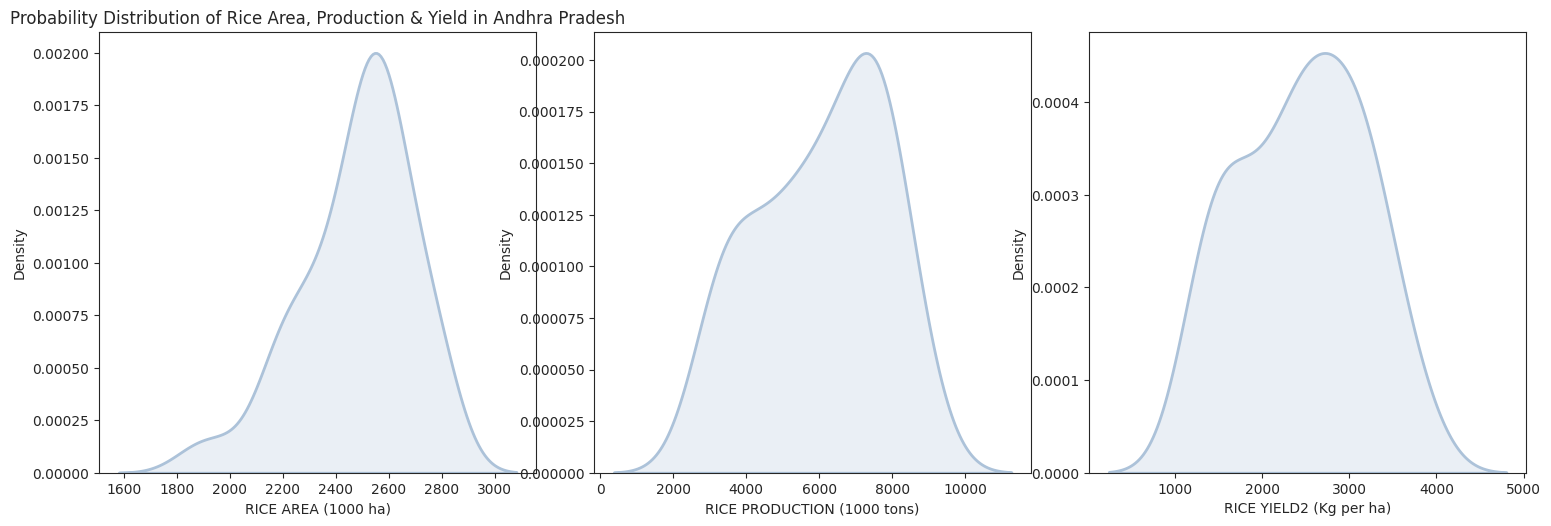

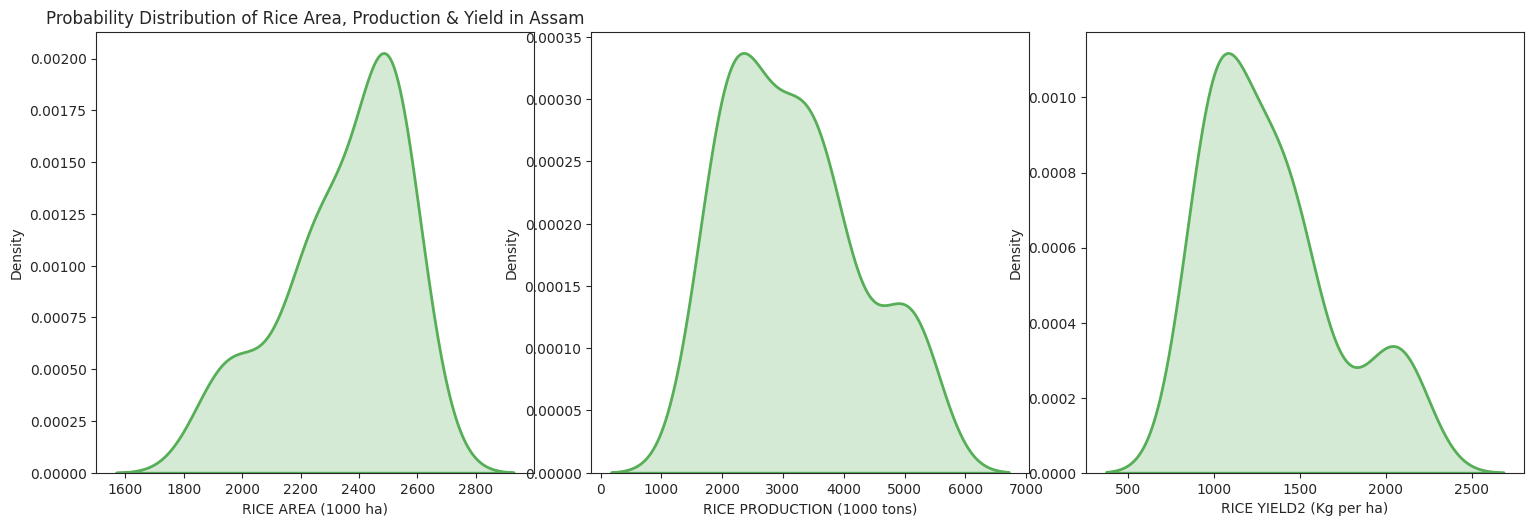

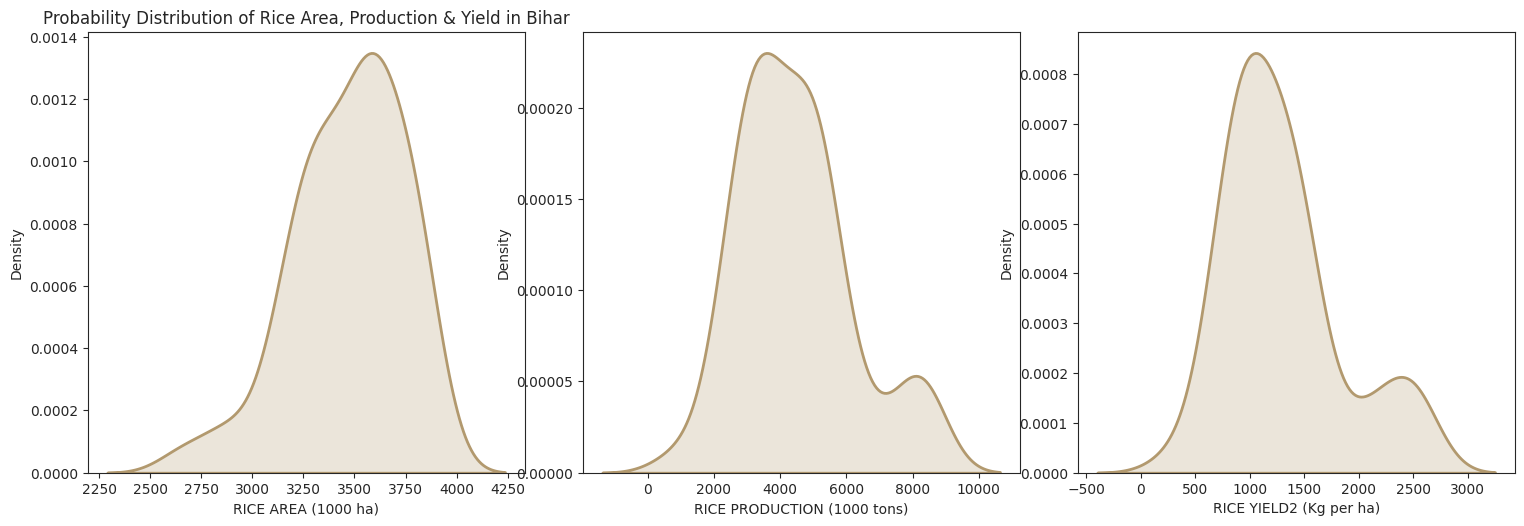

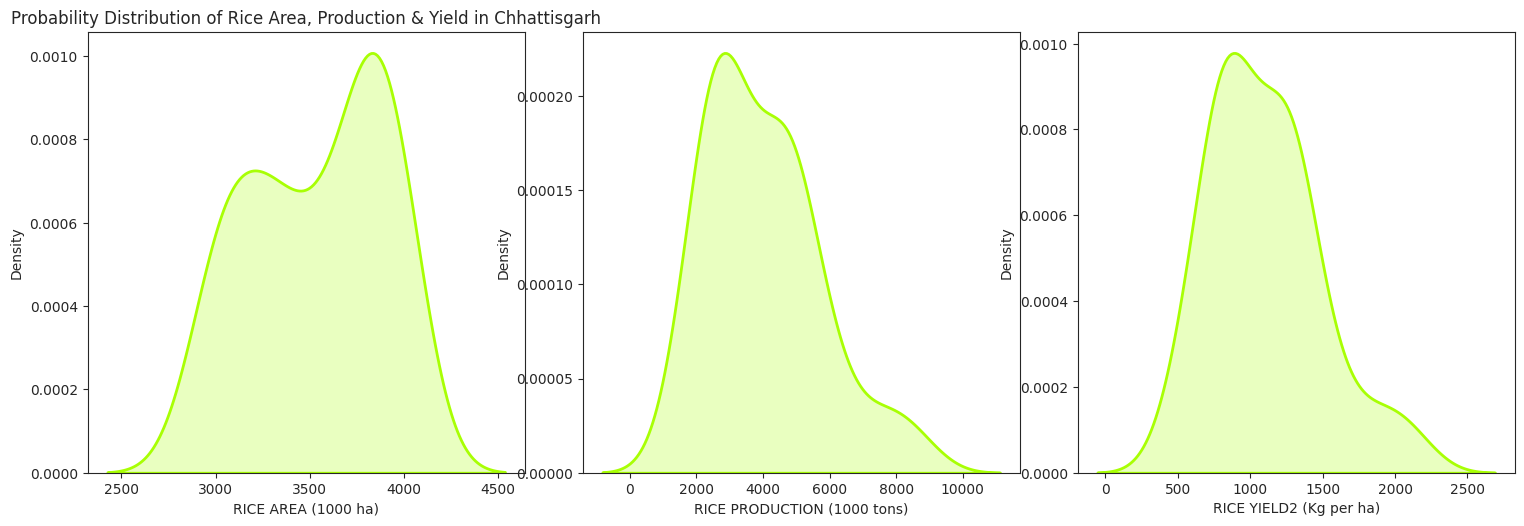

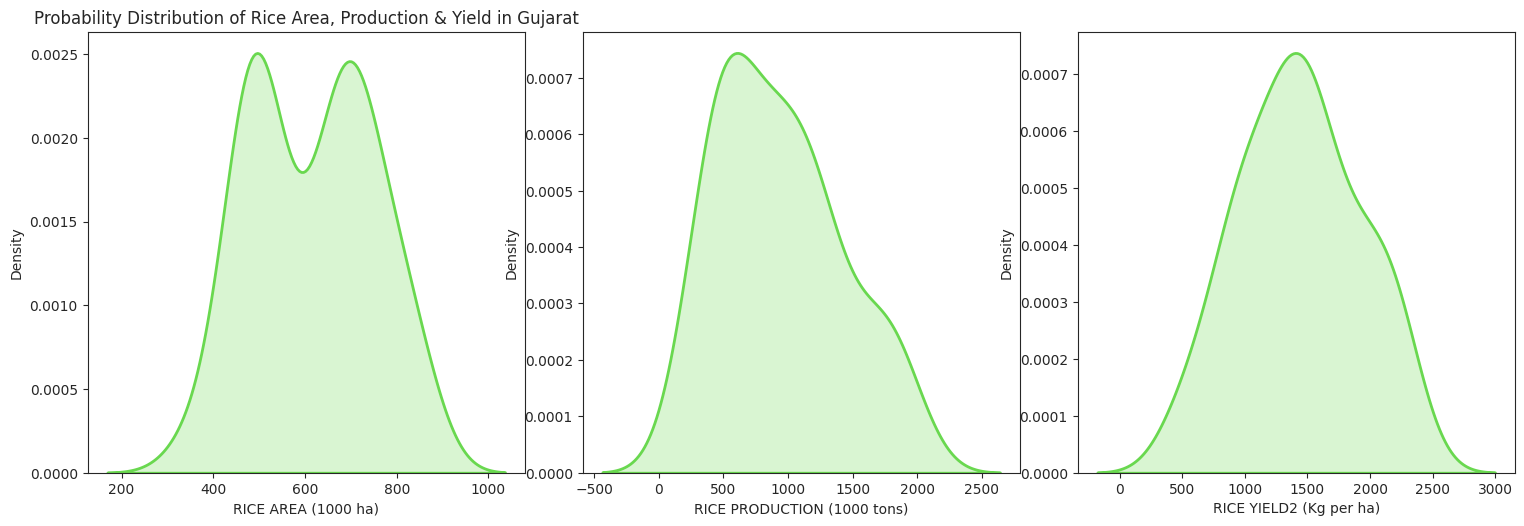

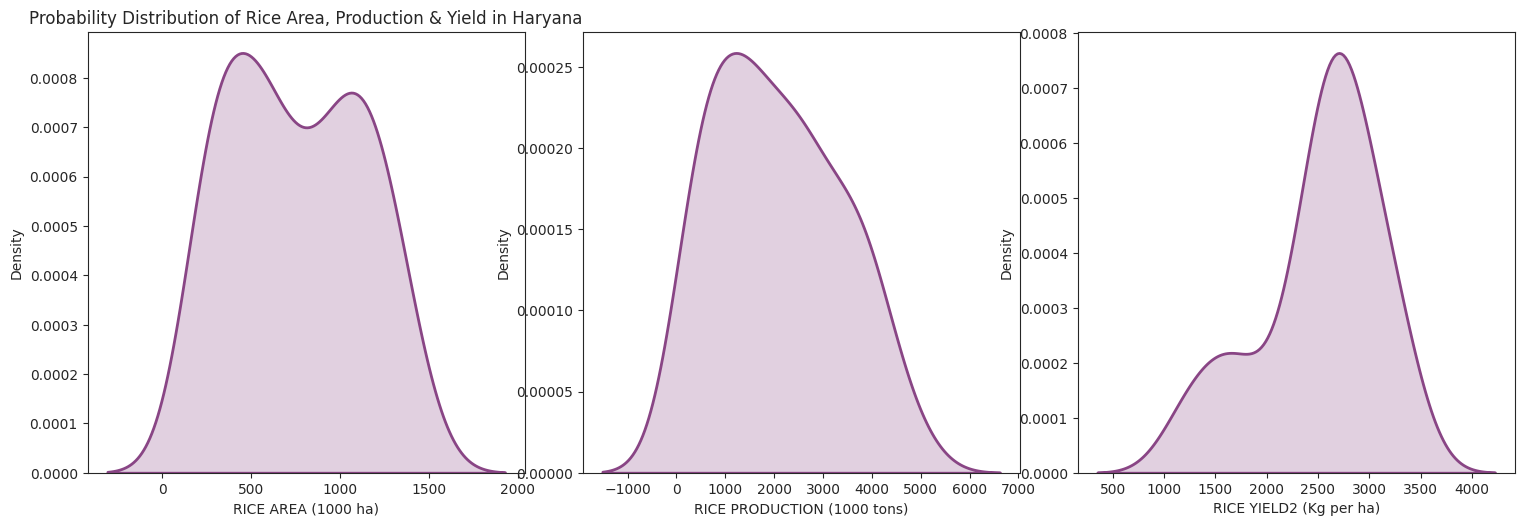

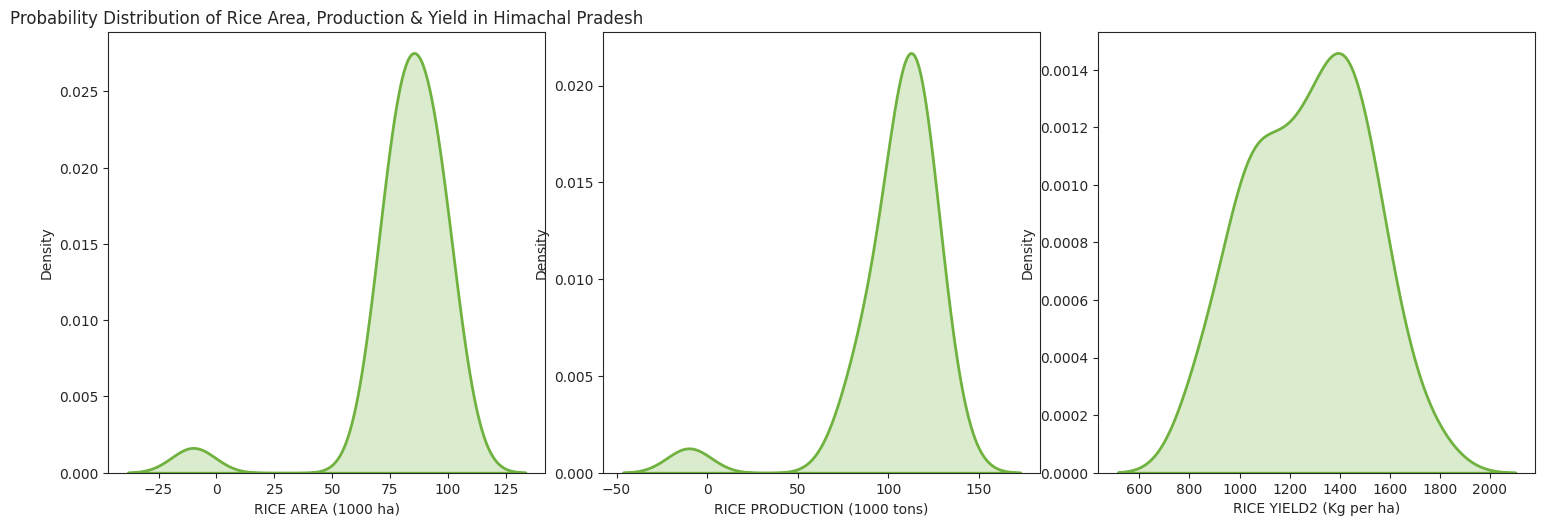

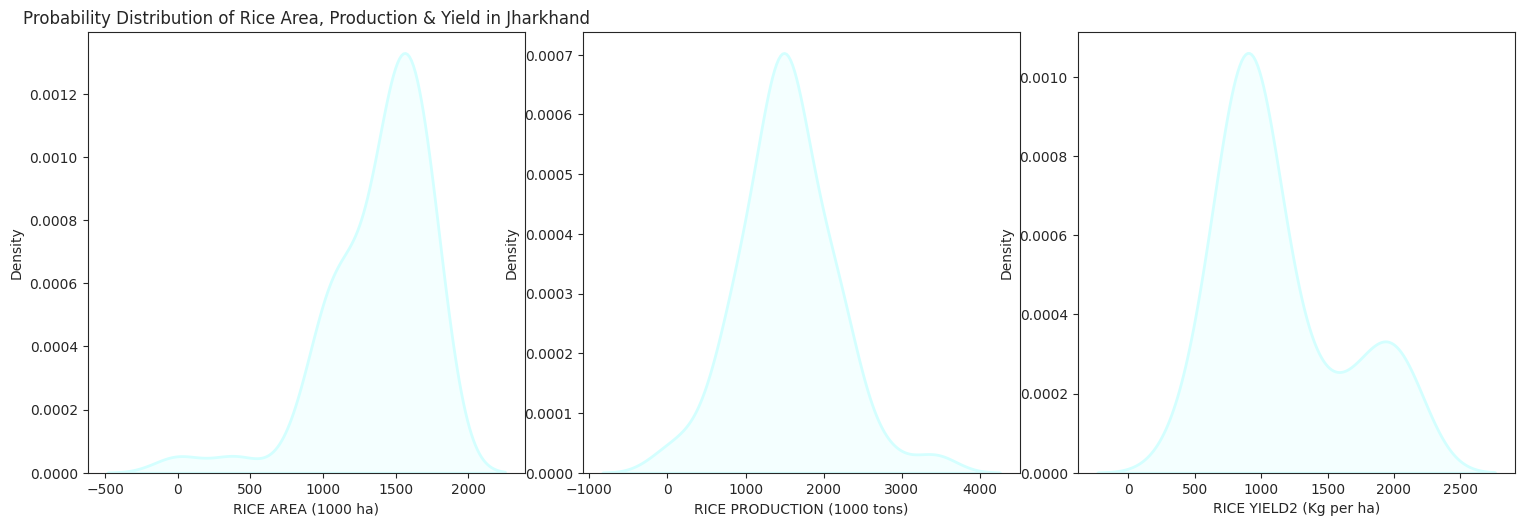

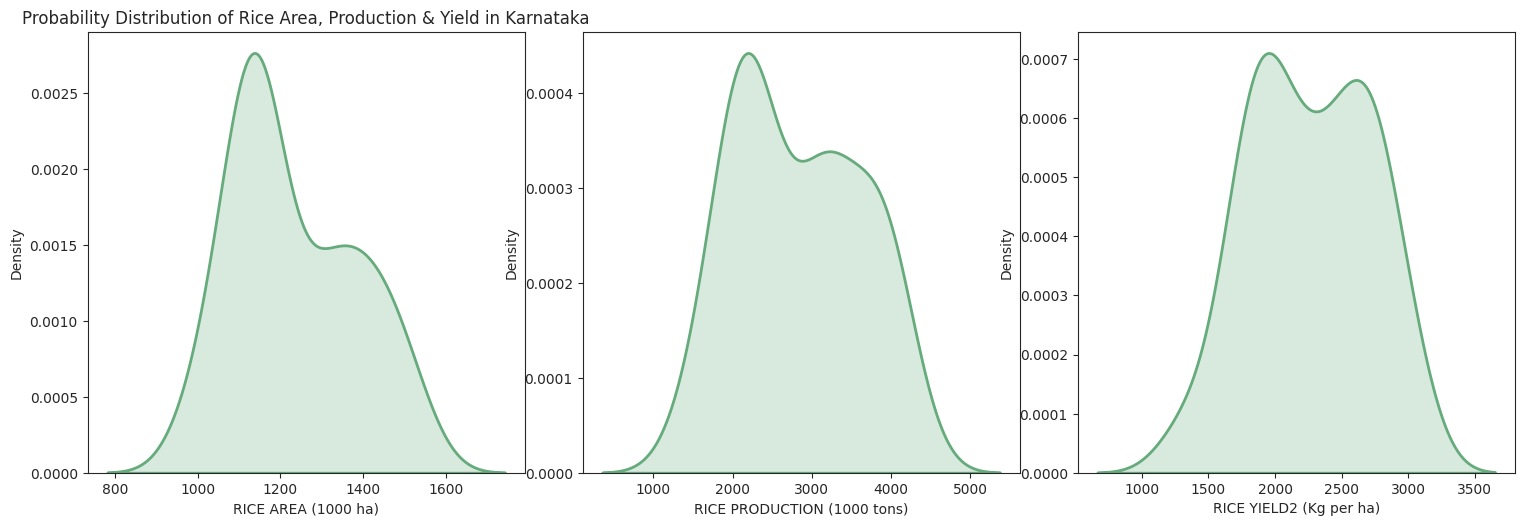

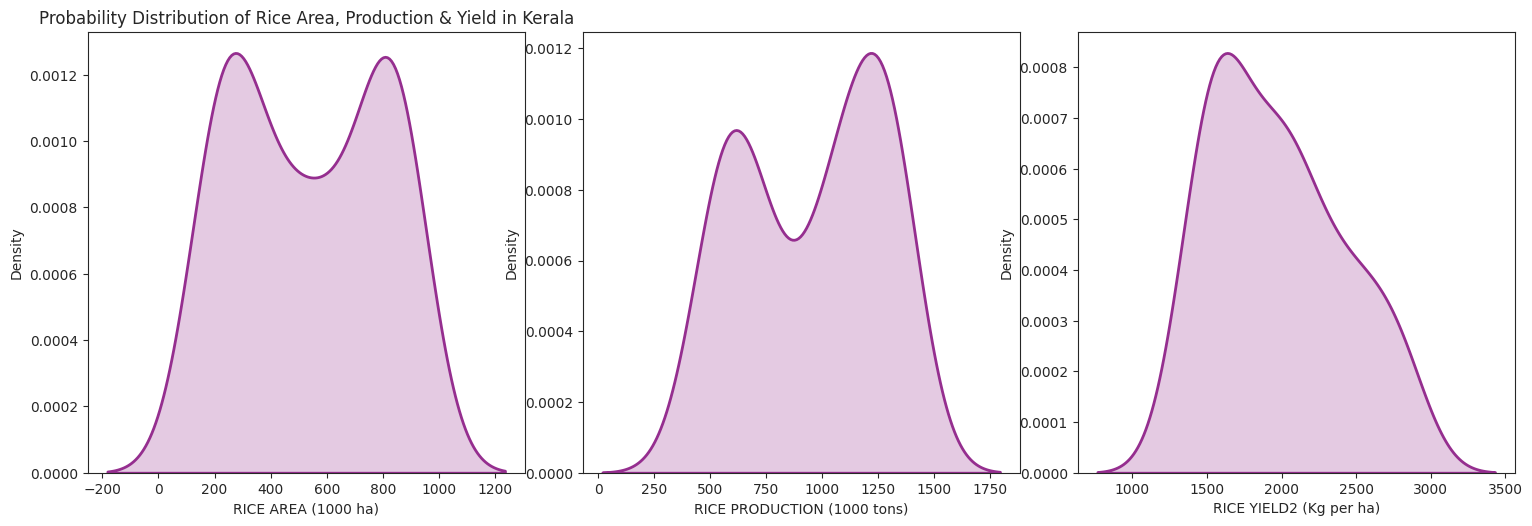

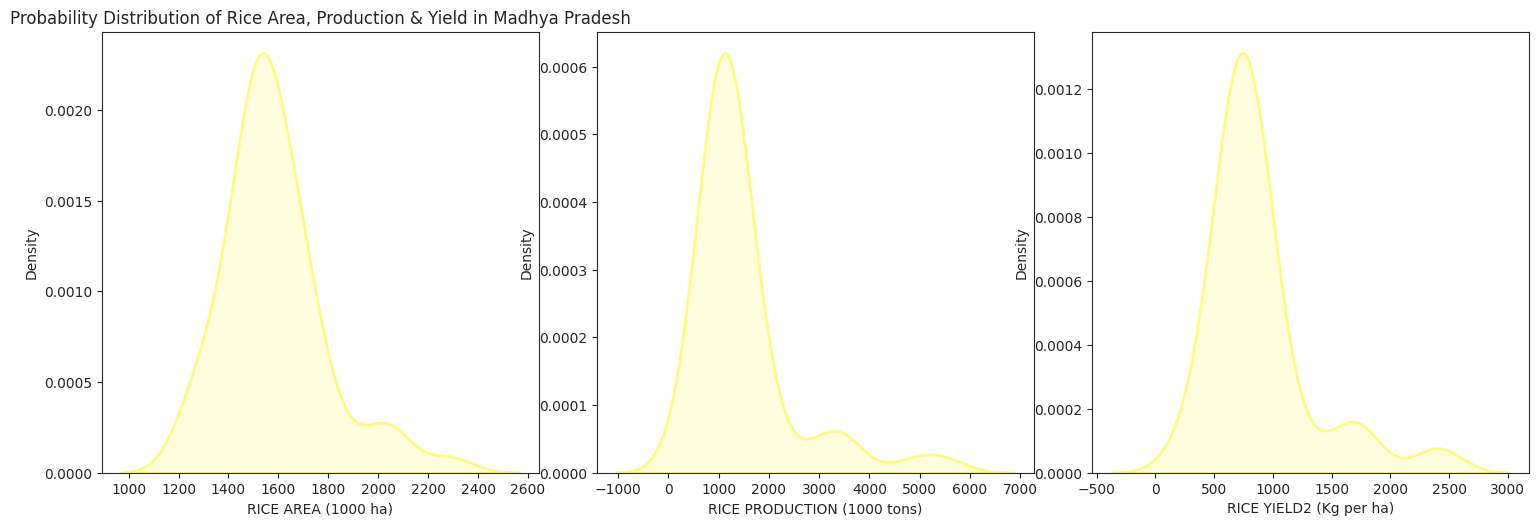

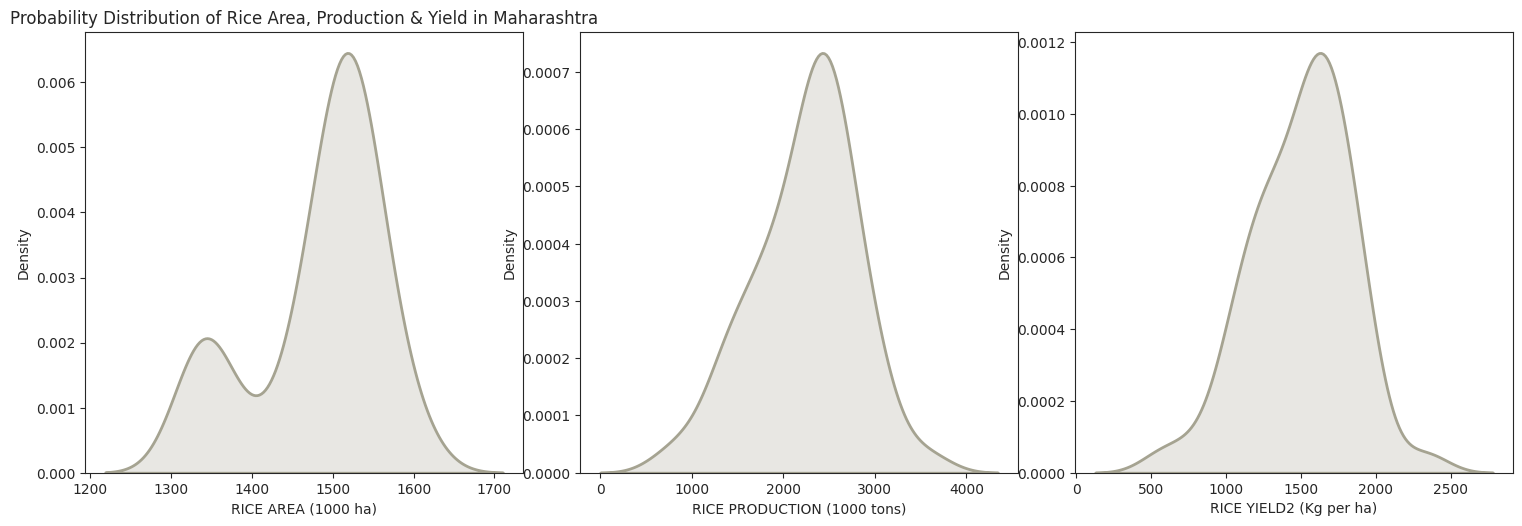

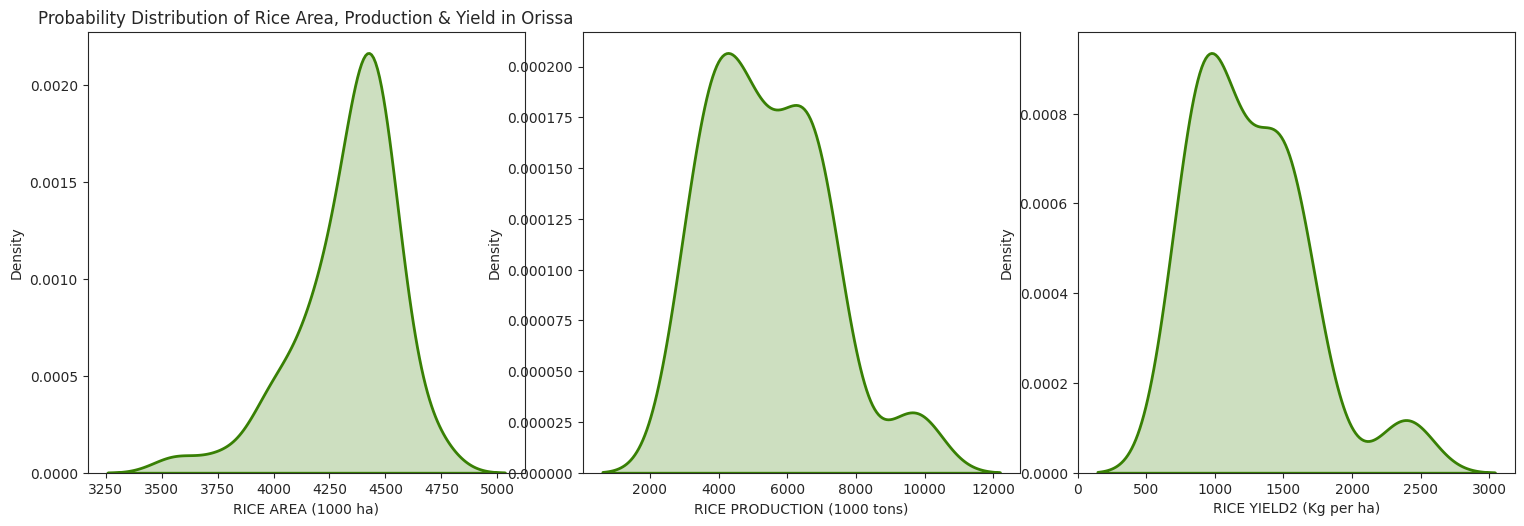

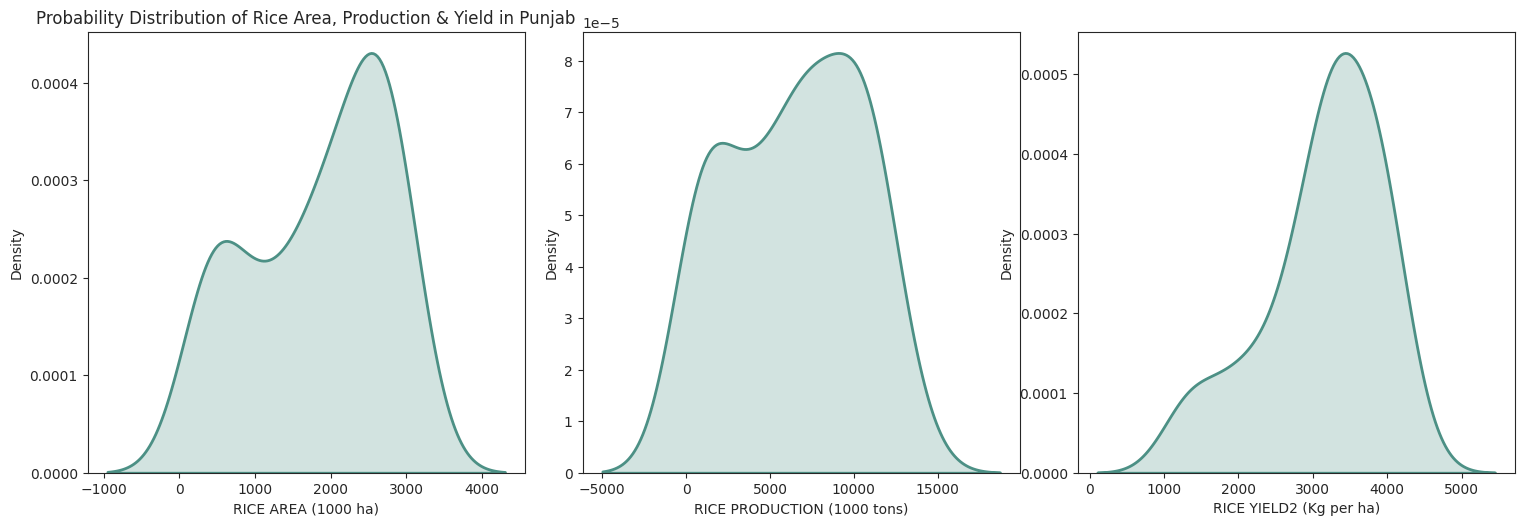

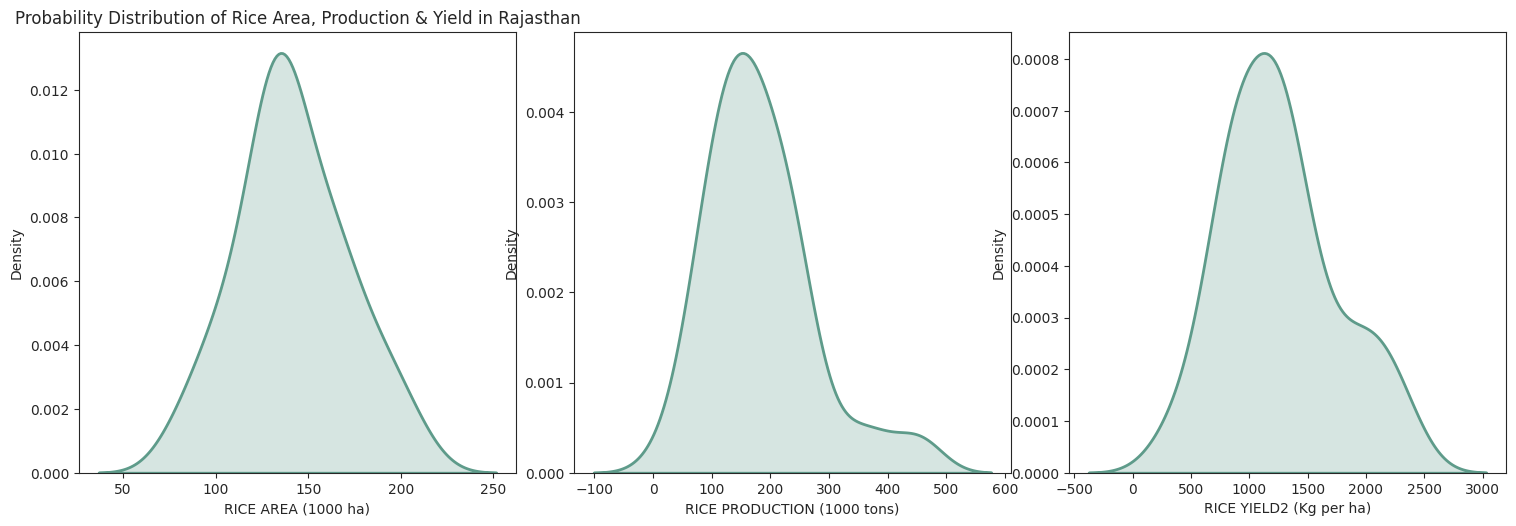

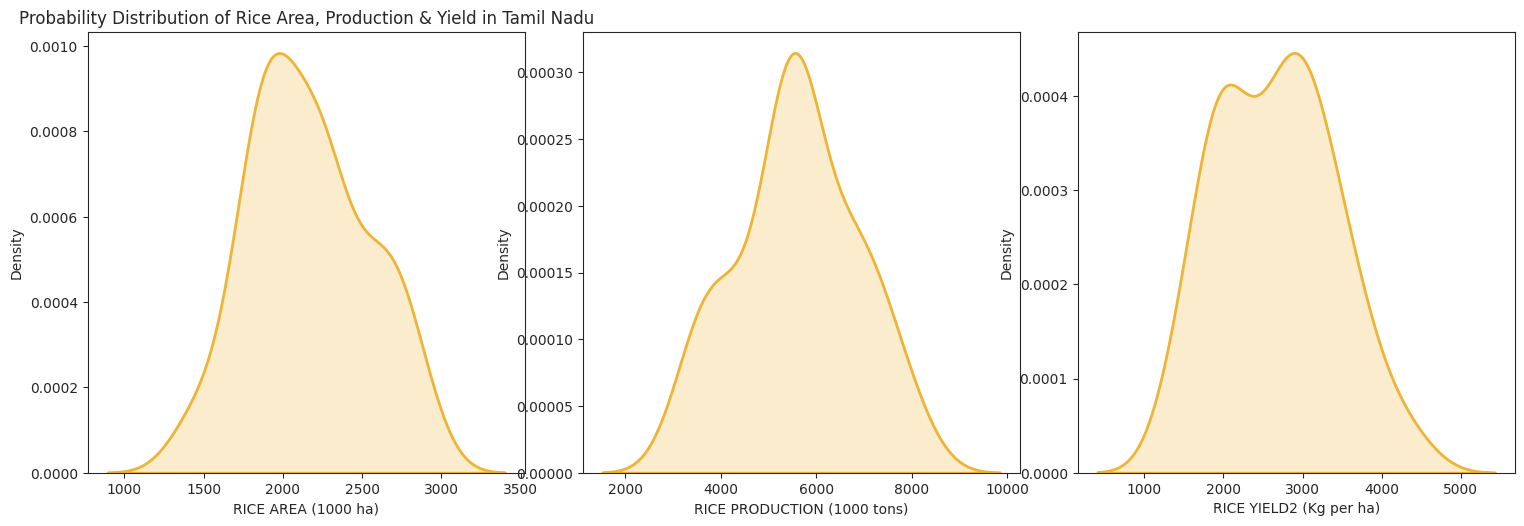

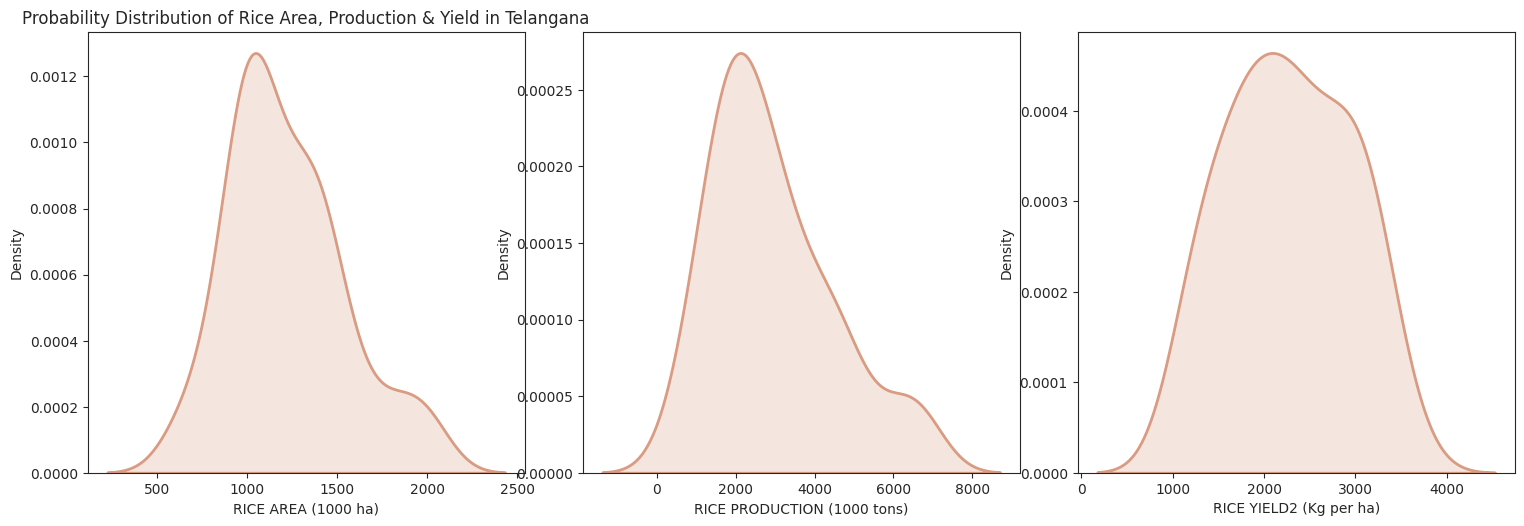

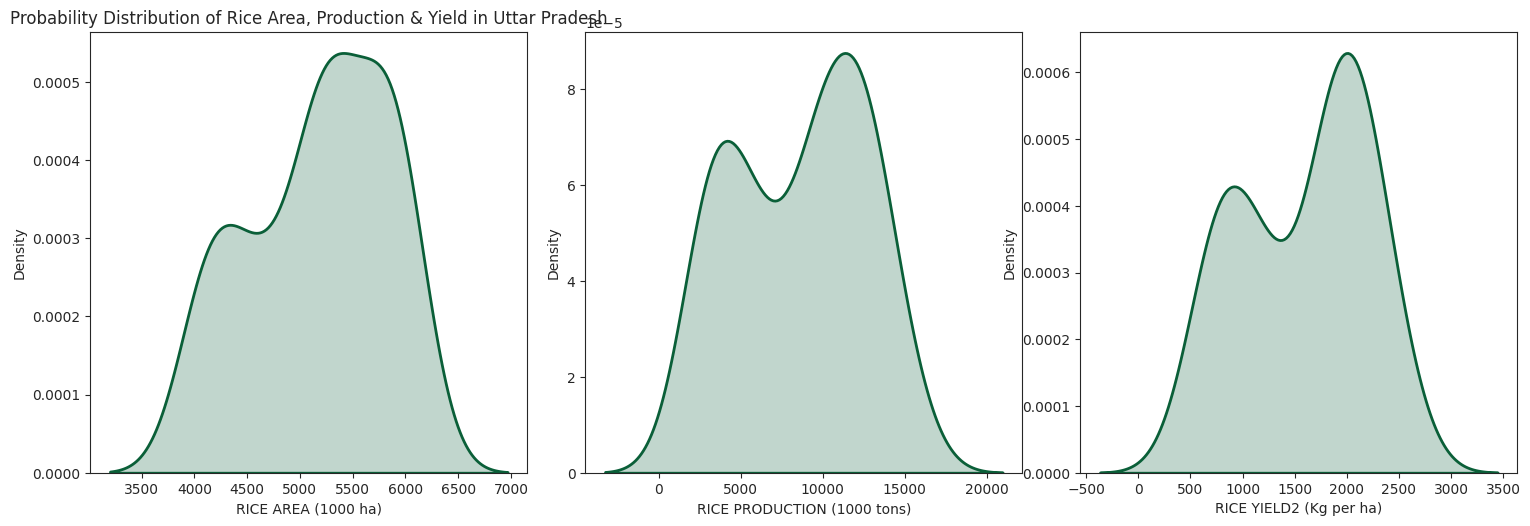

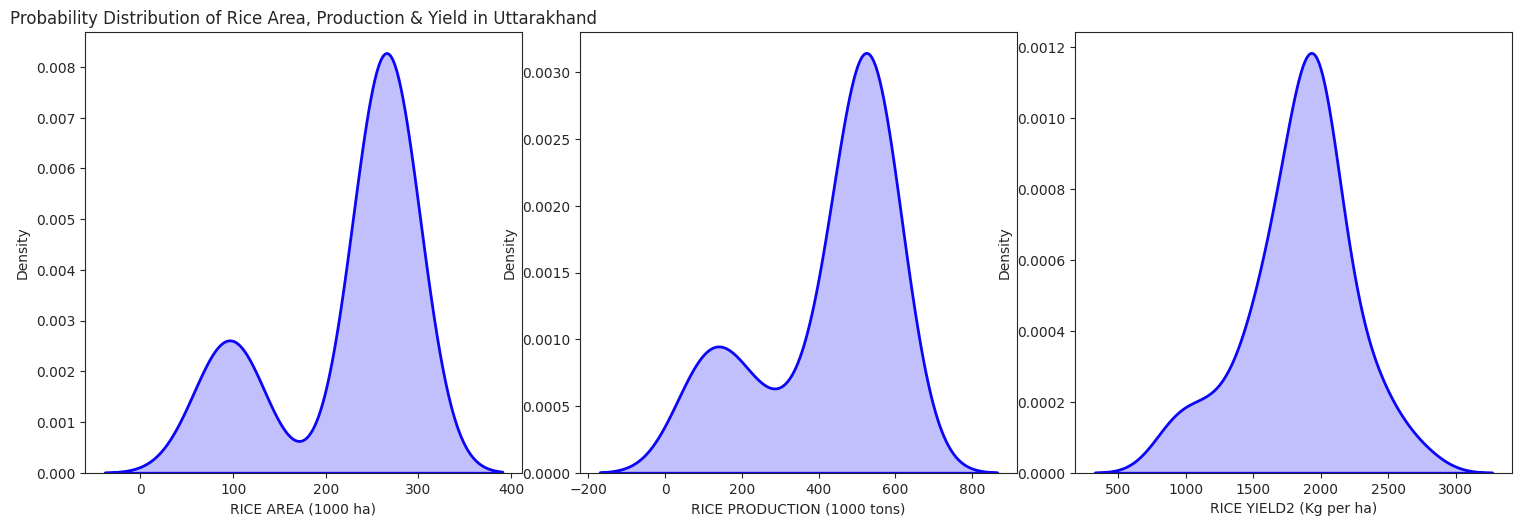

In [14]:
#Plotting the probability density functions of rice area, rice production and rice yield for each state
state_name=rice_state2['State Name'].unique() #get the unique state names
colors = list(mcolors.XKCD_COLORS.values()) #generate a list of colours to differentiate plots

for i in range(0,len(state_name)-1):
    fig, (ay1, ay2, ay3) = plt.subplots(1, 3, figsize=(15, 5))
    fig.tight_layout()
    sns.kdeplot(data = rice_state2[rice_state2['State Name']==state_name[i]], x = "RICE AREA (1000 ha)", color= colors[i], legend = True, fill=True, linewidth=2, ax= ay1)
    ay1.title.set_text('Probability Distribution of Rice Area, Production & Yield in '+ state_name[i]) #add a plot title for each state
    sns.kdeplot(data = rice_state2[rice_state2['State Name']==state_name[i]], x = "RICE PRODUCTION (1000 tons)", color= colors[i],legend = False, fill=True, linewidth=2, ax = ay2)
    sns.kdeplot(data = rice_state2[rice_state2['State Name']==state_name[i]], x = "RICE YIELD2 (Kg per ha)", color= colors[i], legend = False, fill=True, linewidth=2,ax =ay3)

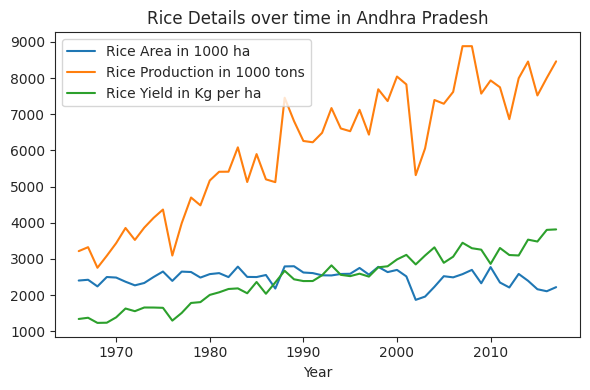

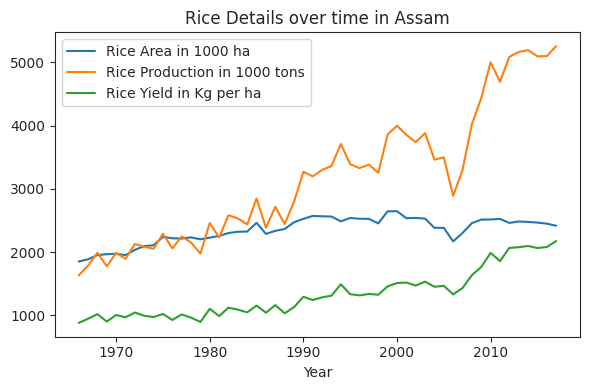

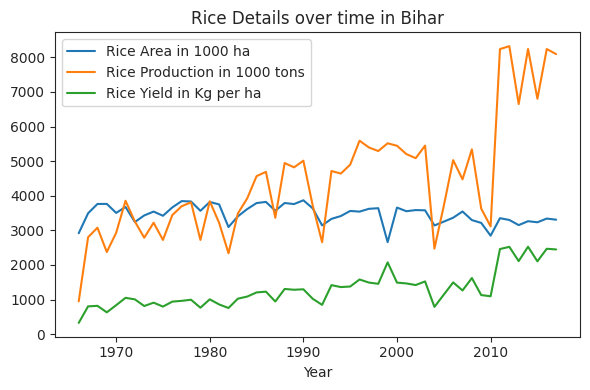

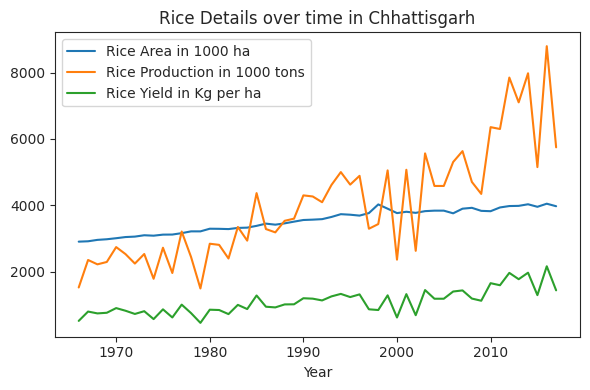

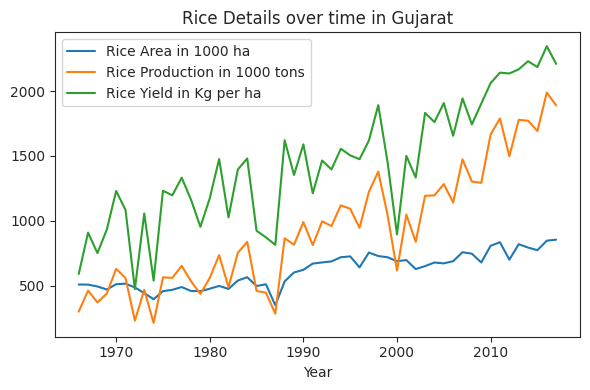

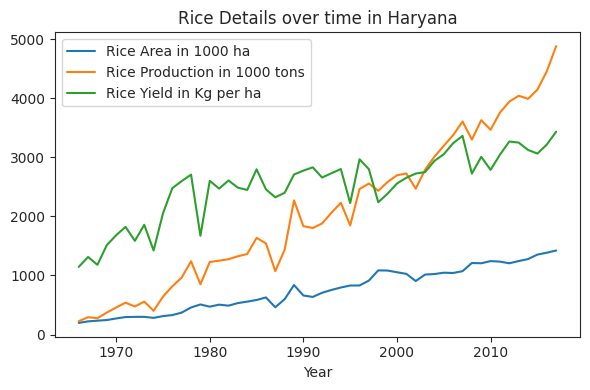

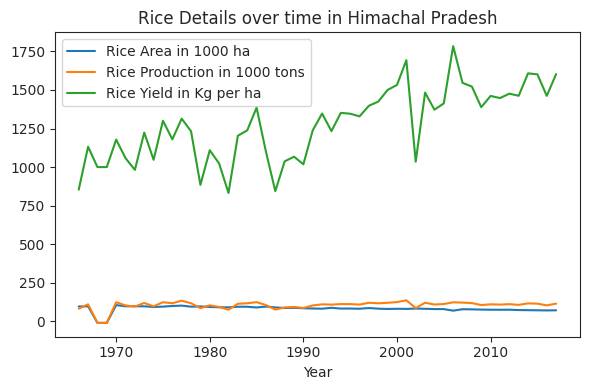

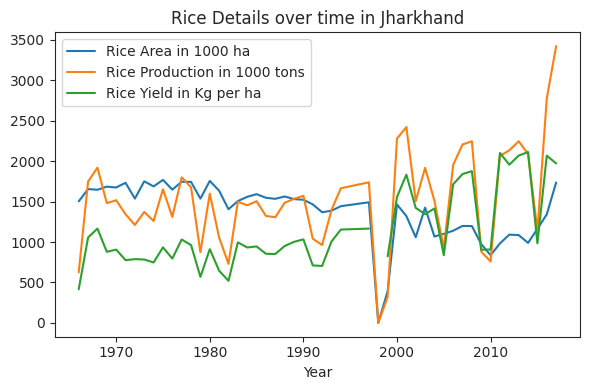

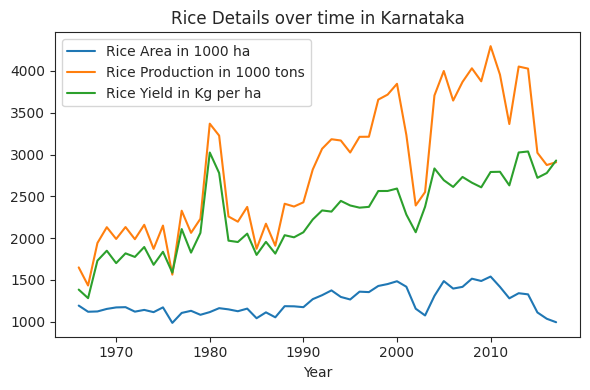

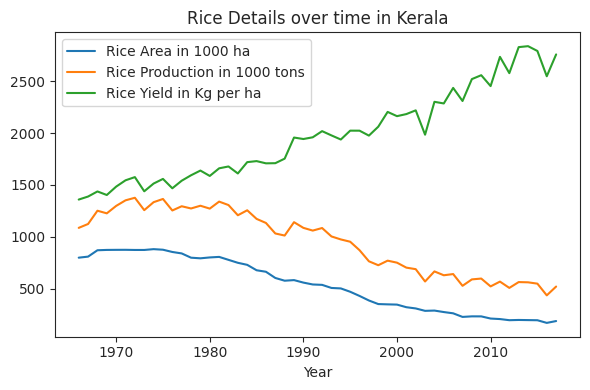

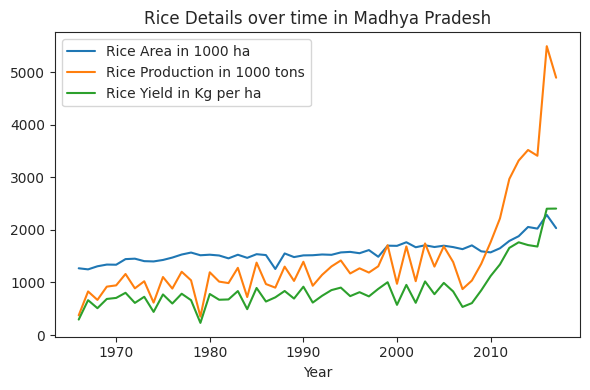

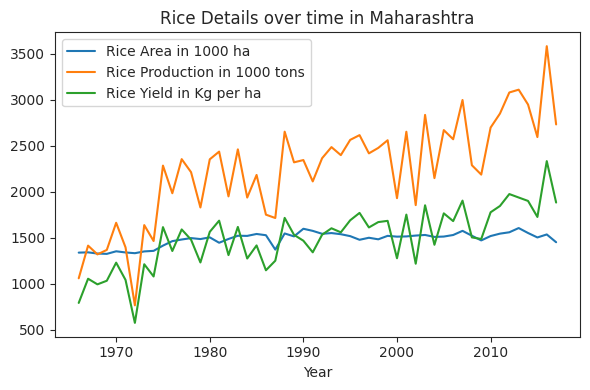

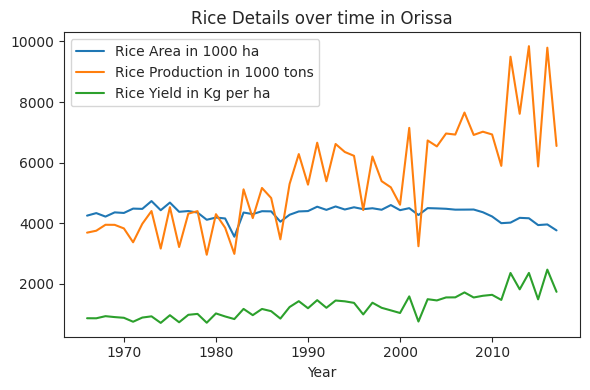

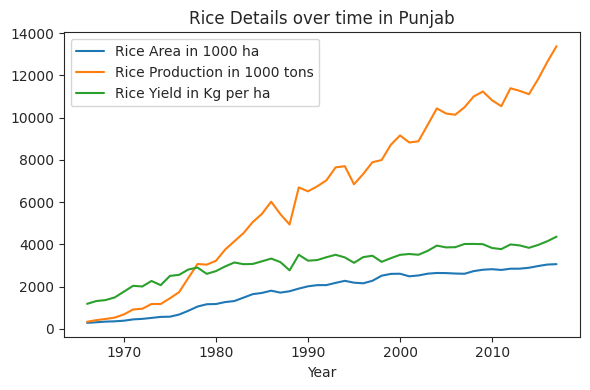

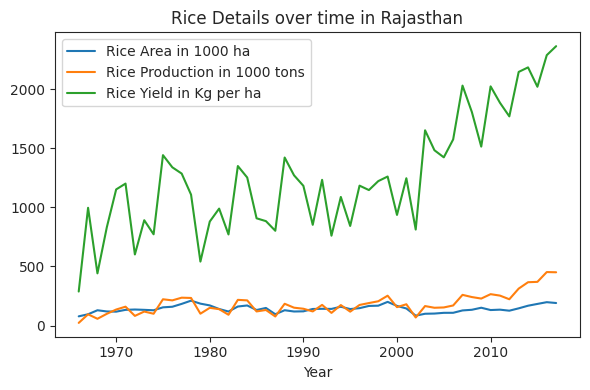

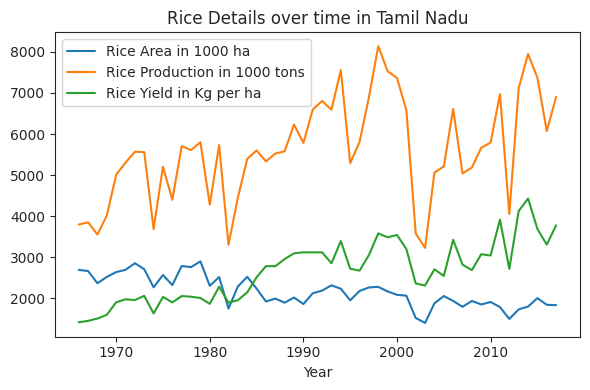

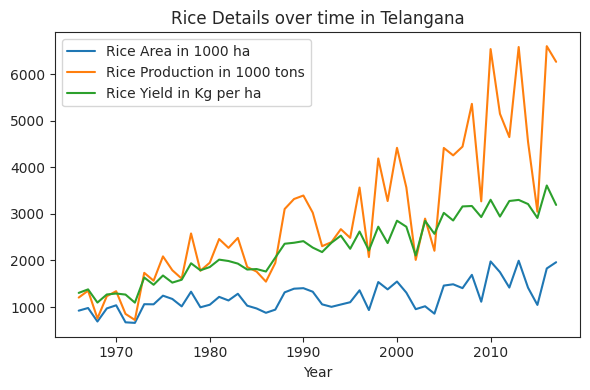

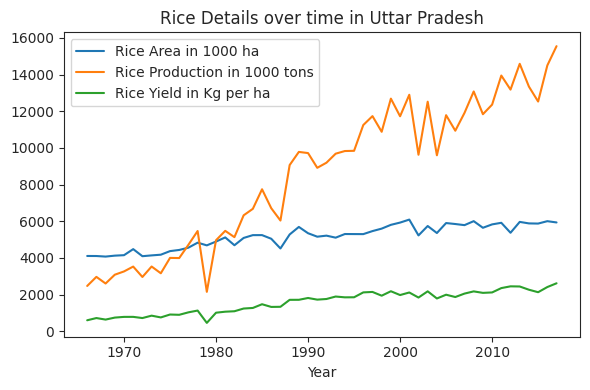

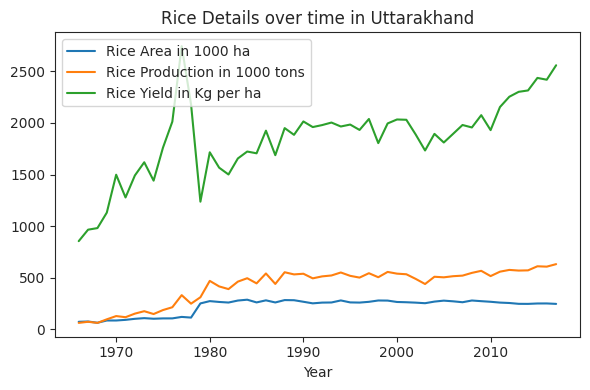

In [15]:
for i in range(0,len(state_name)-1):
  fig, ax = plt.subplots(figsize=(6, 4))
  # Filter the entire DataFrame first to ensure consistent shapes for 'yrs' and other columns
  temp = rice_state2[rice_state2['State Name']==state_name[i]]
  yrs = temp["Year"]
  ax.plot(yrs, temp["RICE AREA (1000 ha)"], label='Rice Area in 1000 ha')
  ax.plot(yrs, temp["RICE PRODUCTION (1000 tons)"], label='Rice Production in 1000 tons')
  #The column RICE YIELD (Kg per ha) was dropped earlier and replaced by RICE YIELD2 (Kg per ha)
  ax.plot(yrs, temp["RICE YIELD2 (Kg per ha)"], label='Rice Yield in Kg per ha')
  ax.set_title('Rice Details over time in '+ state_name[i]) #Modified to include the state name in the title
  ax.legend(loc='upper left')
  ax.set_xlabel('Year')
  plt.grid(False)
  fig.tight_layout()
  plt.show()

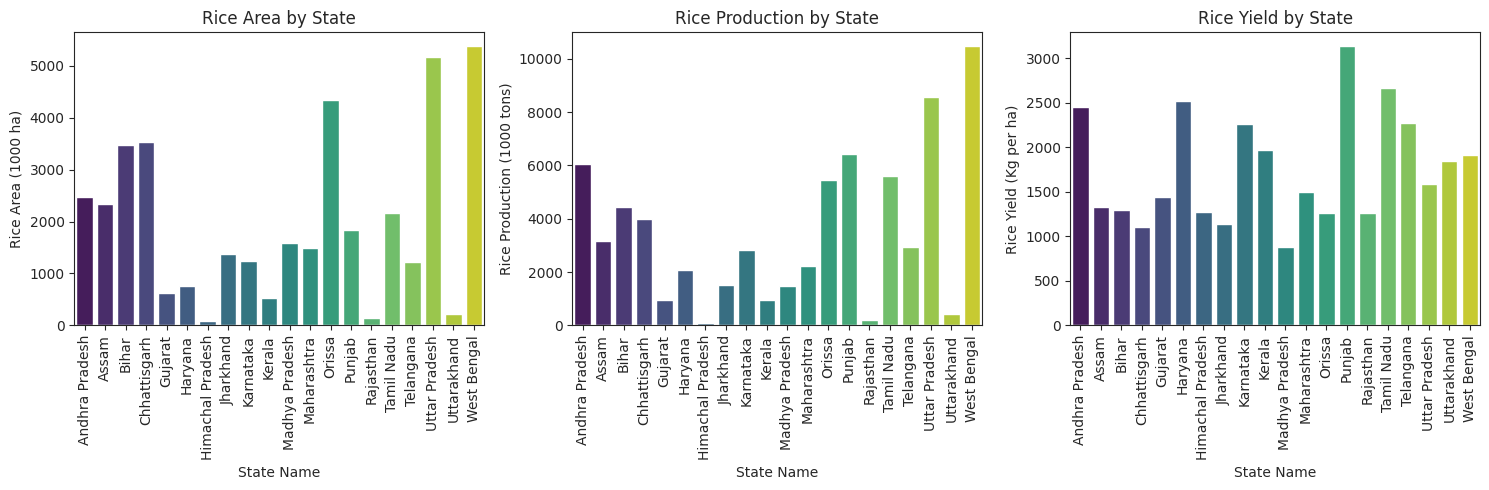

In [16]:
# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
#area plot
sns.barplot(data=rice_state2, hue ='State Name', x='State Name',  y='RICE AREA (1000 ha)', legend = False, errorbar = None, palette='viridis', ax = ax1)
ax1.set_title('Rice Area by State')
ax1.set_xlabel('State Name')
ax1.set_ylabel('Rice Area (1000 ha)')
ax1.tick_params(axis='x', labelrotation=90) #rotate labels to enhance readability
#production plot
sns.barplot(data=rice_state2, hue ='State Name',x='State Name', y='RICE PRODUCTION (1000 tons)', legend = False, errorbar = None, palette='viridis', ax = ax2)
ax2.set_title('Rice Production by State')
ax2.set_xlabel('State Name')
ax2.set_ylabel('Rice Production (1000 tons)')
ax2.tick_params(axis='x', labelrotation=90)
#yield plot
sns.barplot(data=rice_state2, hue ='State Name', x='State Name', y='RICE YIELD2 (Kg per ha)', legend = False, errorbar = None, palette='viridis', ax = ax3)
ax3.set_title('Rice Yield by State')
ax3.set_xlabel('State Name')
ax3.set_ylabel('Rice Yield (Kg per ha)')
ax3.tick_params(axis='x', labelrotation=90)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [17]:
rice_year=rice_state2.groupby(['Year']).sum().reset_index()
rice_year_last10years=rice_year.tail(10)
rice_year_last10years

Year                                         State Name  State Code  \
42  2008  Andhra PradeshAssamBiharChhattisgarhGujaratHar...         210   
43  2009  Andhra PradeshAssamBiharChhattisgarhGujaratHar...         210   
44  2010  Andhra PradeshAssamBiharChhattisgarhGujaratHar...         210   
45  2011  Andhra PradeshAssamBiharChhattisgarhGujaratHar...         210   
46  2012  Andhra PradeshAssamBiharChhattisgarhGujaratHar...         210   
47  2013  Andhra PradeshAssamBiharChhattisgarhGujaratHar...         210   
48  2014  Andhra PradeshAssamBiharChhattisgarhGujaratHar...         210   
49  2015  Andhra PradeshAssamBiharChhattisgarhGujaratHar...         210   
50  2016  Andhra PradeshAssamBiharChhattisgarhGujaratHar...         210   
51  2017  Andhra PradeshAssamBiharChhattisgarhGujaratHar...         210   

    RICE AREA (1000 ha)  RICE PRODUCTION (1000 tons)  RICE YIELD2 (Kg per ha)  
42             43756.82                     95226.84             42807.857608  
43             41438.76                     88070.69             41839.309770  
44             41880.28                     94300.23             43556.393233  
45             42182.73                    102216.27             47856.222444  
46             40836.34                    104237.62             48910.738584  
47             43081.16                    109552.42             50442.172758  
48             42533.05                    112551.62             52179.979502  
49             41814.24                     98820.51             47246.003255  
50             42963.71                    117614.10             53225.440464  
51             42976.53                    114319.61             52638.524262

In [18]:
fig2 = px.pie(rice_year_last10years, names='Year', values='RICE PRODUCTION (1000 tons)',
             title='Total Rice Production over the last 10 years',
             color='Year',
             hole=0.3,  # Adjust the size of the hole in the pie chart
             color_discrete_sequence=px.colors.sequential.Viridis)
fig2.update_layout(height=600, width=600)
fig2.show()

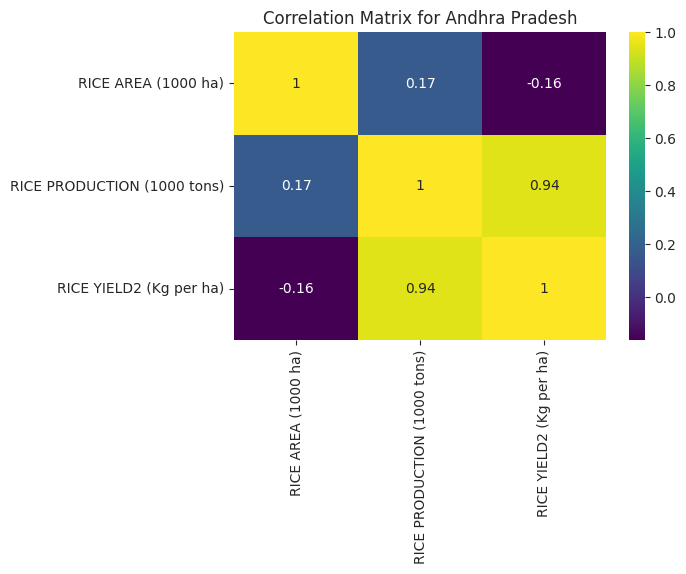

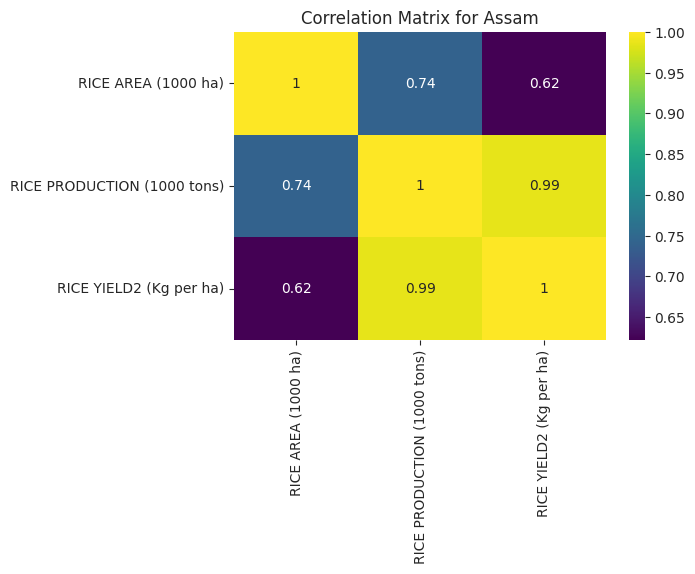

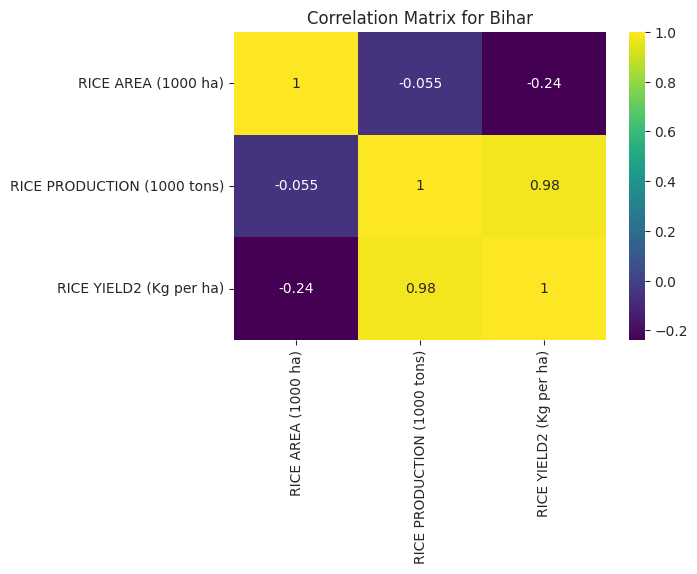

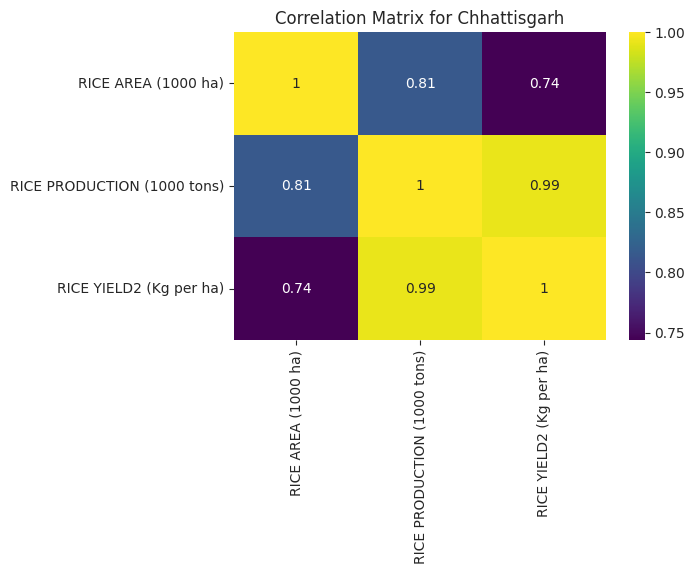

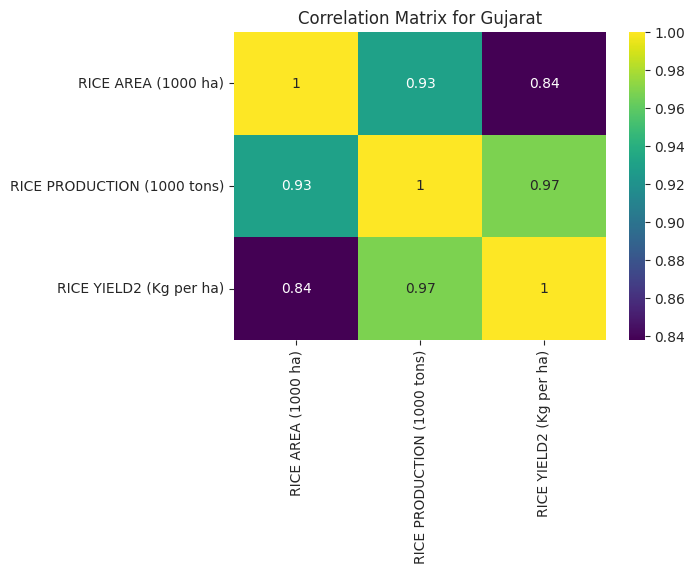

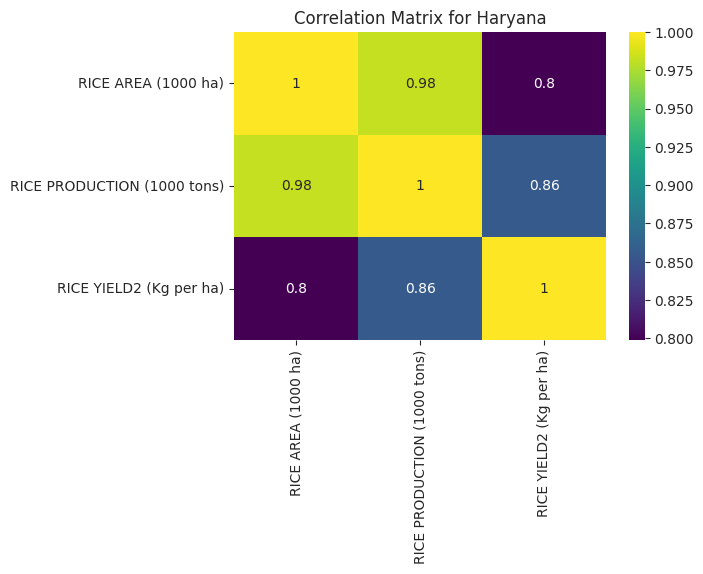

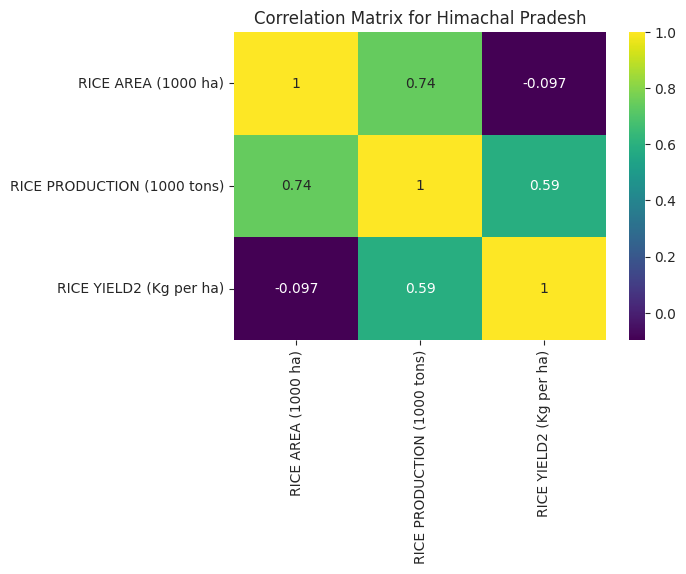

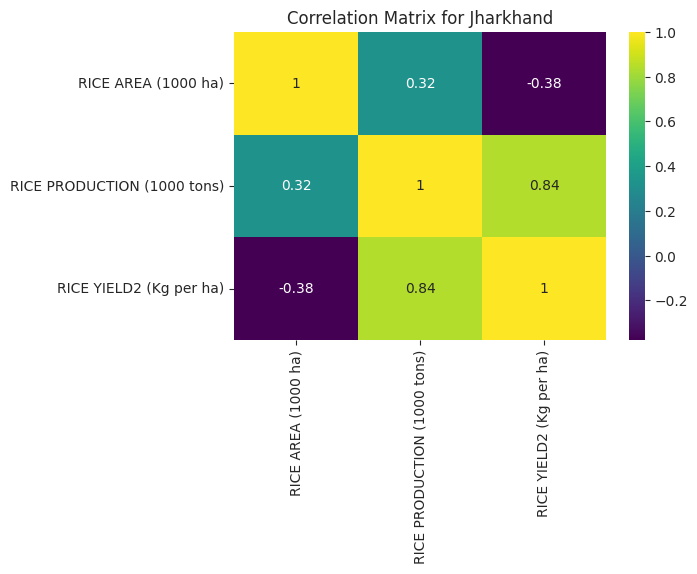

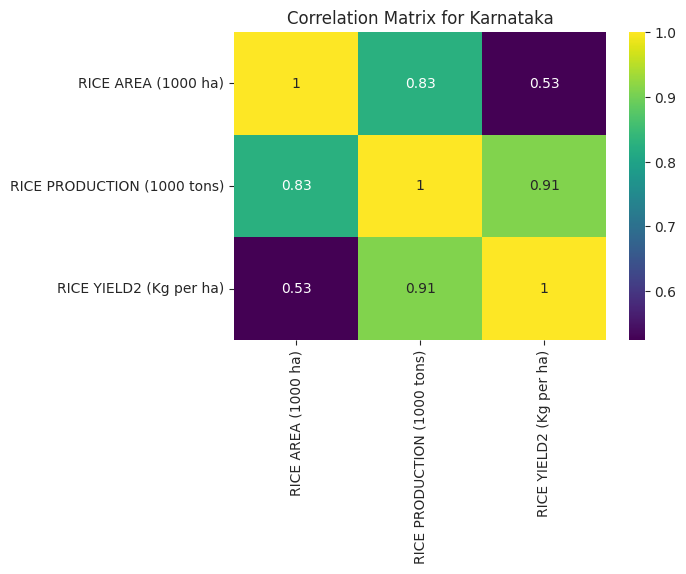

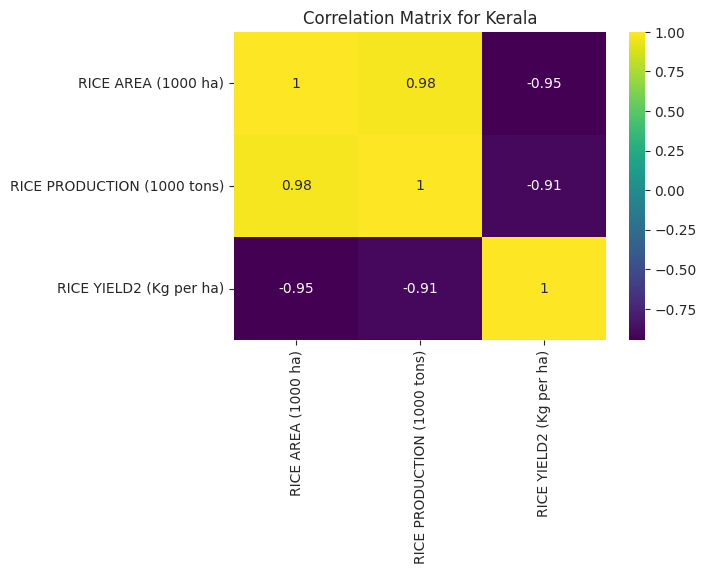

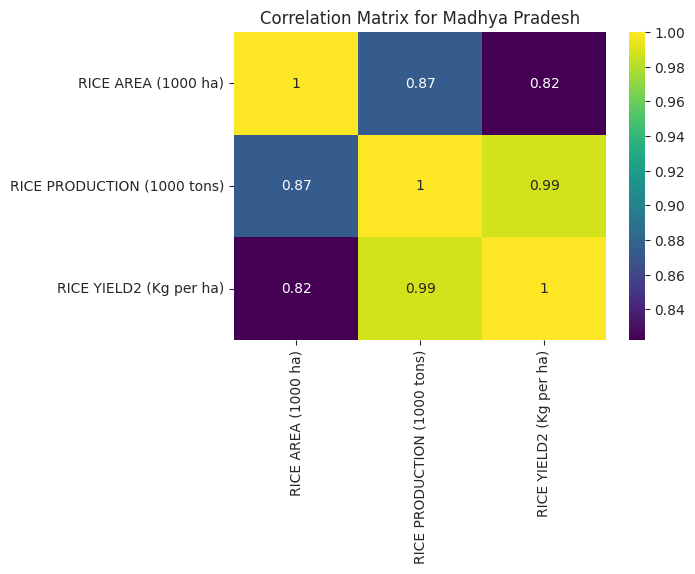

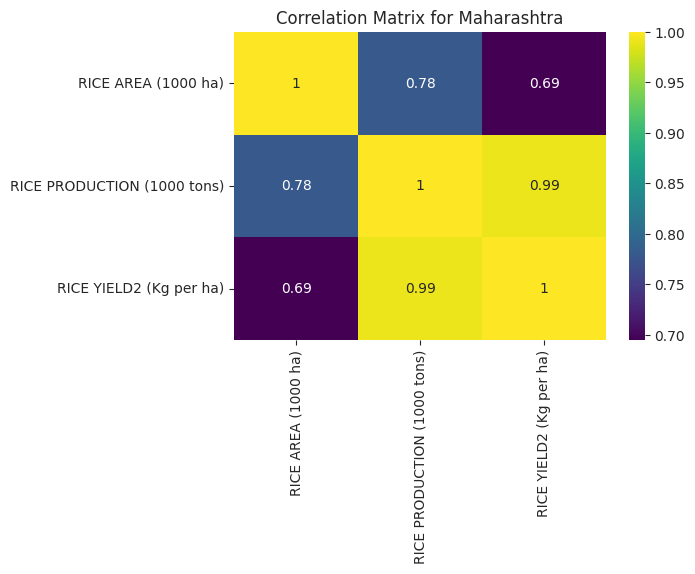

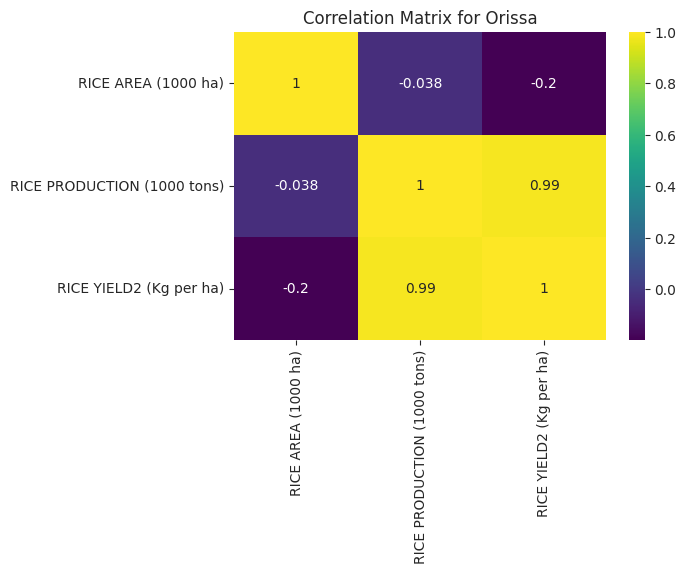

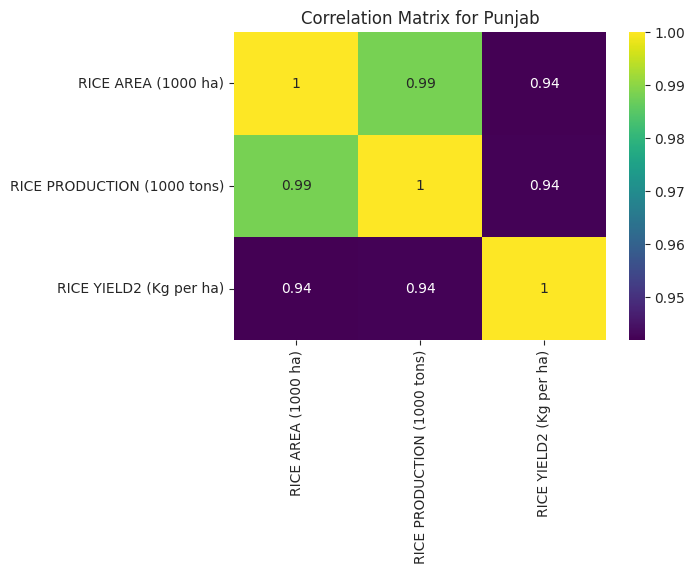

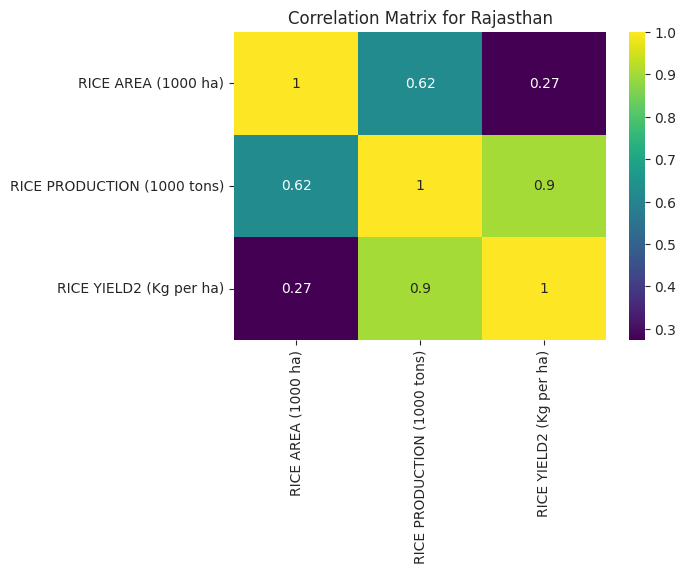

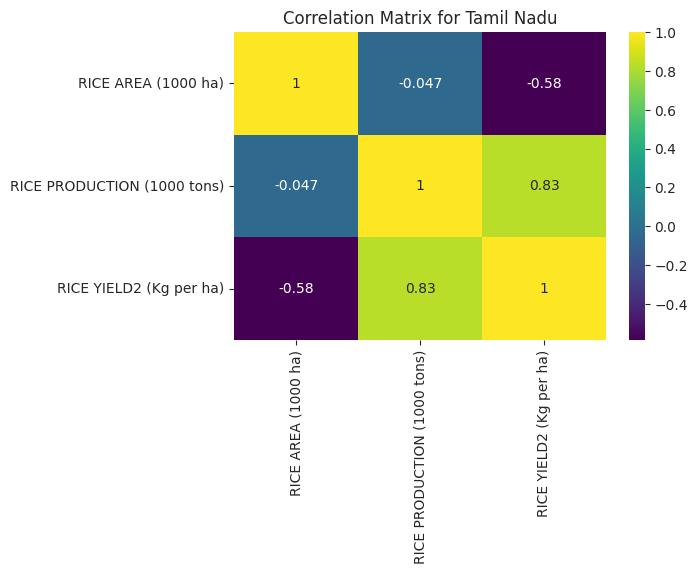

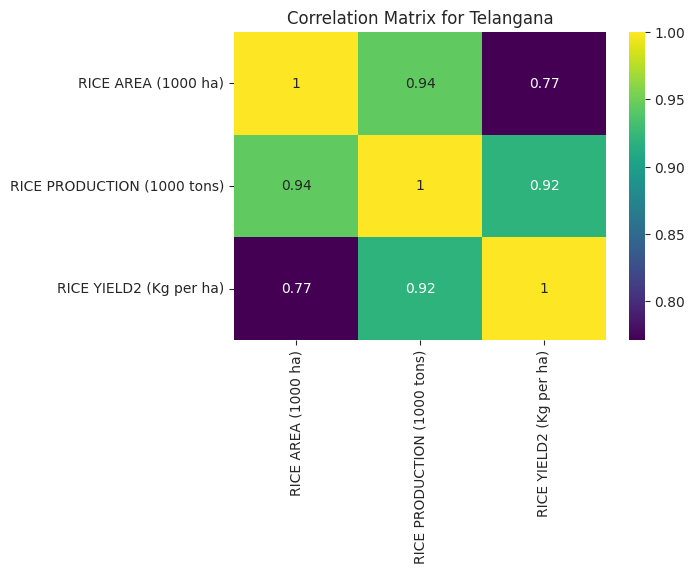

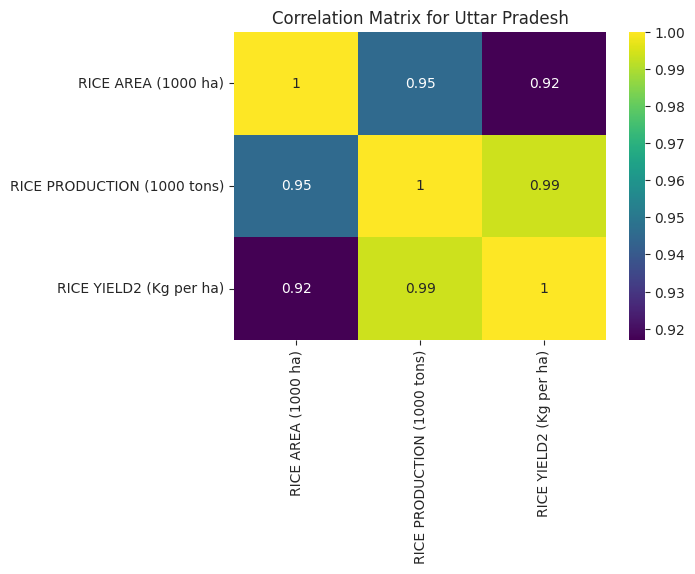

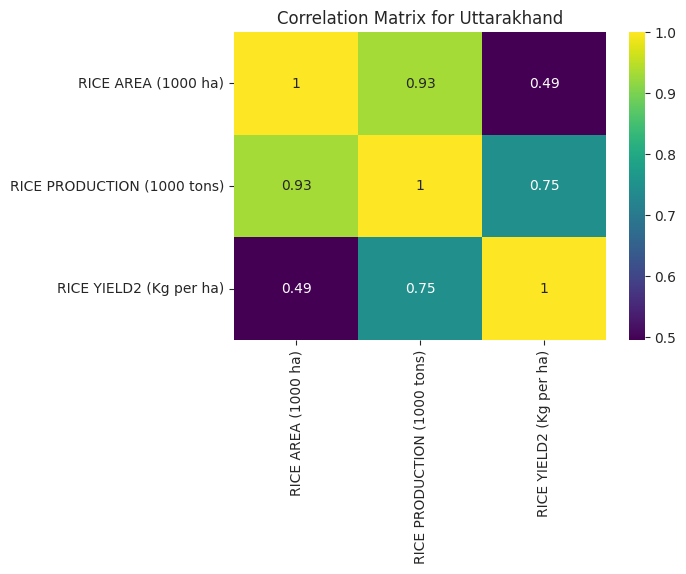

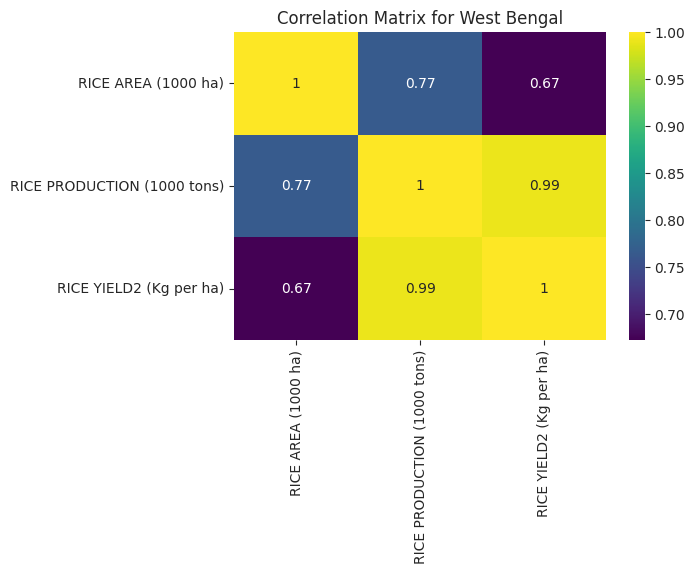

In [56]:
for i in range(len(state_name)):
    fig, axes = plt.subplots(figsize=(6, 4))  # Adjusted figsize for better visibility

    # Select only numerical columns for correlation calculation
    df_corr = rice_state2[rice_state2['State Name'] == state_name[i]].select_dtypes(include=['number'])
    df_corr2 = df_corr.drop(['State Code', 'Year'], axis=1)  # Drop 'State Code' and 'Year'

    # Create a heatmap using Seaborn
    sns.heatmap(data=df_corr2.corr(), annot=True, cmap="viridis", ax=axes)

    # Set the title using the axes object
    axes.set_title('Correlation Matrix for ' + state_name[i])

    plt.show()